In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv('spam.csv')
data = data[data.columns[1:]]
data.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


In [4]:
data.columns

Index(['make', 'address', 'all', 'num3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', 'num000',
       'money', 'hp', 'hpl', 'george', 'num650', 'lab', 'labs', 'telnet',
       'num857', 'data', 'num415', 'num85', 'technology', 'num1999', 'parts',
       'pm', 'direct', 'cs', 'meeting', 'original', 'project', 're', 'edu',
       'table', 'conference', 'charSemicolon', 'charRoundbracket',
       'charSquarebracket', 'charExclamation', 'charDollar', 'charHash',
       'capitalAve', 'capitalLong', 'capitalTotal', 'type'],
      dtype='object')

In [5]:
spam = data[data["type"] == "spam"]
nonspam = data[data["type"] == "nonspam"]

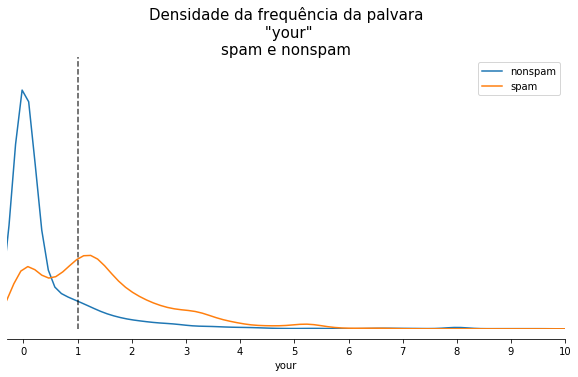

In [6]:
fig, ax = plt.subplots(figsize = (10,5))

ax.set_xlim(-.3,10)
ax.set_ylim(0, 1.5)
ax.set_yticks([])
ax.set_xticks(range(0,11))

plt.title("Densidade da frequência da palvara\n \"your\"\nspam e nonspam", fontsize=15, pad=-10)

sns.distplot(nonspam['your'], hist = False, label="nonspam")
sns.distplot(spam['your'], hist = False, label="spam")
plt.plot([1,1], [0, 1.5], "--", color="black", alpha = 0.7)

sns.despine(offset=10, left=True)

plt.show()

In [ ]:
spam = data[data["type"] == "spam"]
nonspam = data[data["type"] == "nonspam"]
print(len(spam.type)/len(data.type))
print(len(nonspam.type)/len(data.type))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns.values[:-1]], data[data.columns.values[-1:]], test_size=0.3, stratify=data[data.columns.values[-1:]])

In [ ]:
train_spam = y_train[y_train["type"] == "spam"]
train_nonspam = y_train[y_train["type"] == "nonspam"]
print(len(train_spam.type)/len(y_train.type))
print(len(train_nonspam.type)/len(y_train.type))

In [7]:
pred = []
for i in range(0,len(data)):
    if data["your"][i] < 1:
        pred.append("nonspam")
    else:
        pred.append("spam")

In [8]:
confusion_matrix(data["type"], pred)/len(data)

array([[0.51445338, 0.09150185],
       [0.16018257, 0.2338622 ]])

In [9]:
data = pd.DataFrame({"tempo_estudo": [96,77,0,0,78,64,89,47,90,93,18,86,0,30,59,77,74,67],
                     "desempenho": [95,80,0,0,79,77,72,66,98,90,0,95,35,50,72,55,75,66]})
data.index.name = "aluno"
data.head()

,tempo_estudo,desempenho
aluno,,
0,96,95
1,77,80
2,0,0
3,0,0
4,78,79


In [10]:
X = np.array(data["tempo_estudo"]).reshape(-1, 1)
y = np.array(data["desempenho"]).reshape(-1, 1)

In [11]:
np.random.seed(333)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
modelo = LinearRegression().fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [13]:
print("--- R2 ---")
print(modelo.score(X_train, y_train))

print("\n--- B0 ---")
print(modelo.intercept_)

print("\n--- B1 ---")
print(modelo.coef_)

--- R2 ---
0.7507389816251182

--- B0 ---
[11.77278408]

--- B1 ---
[[0.79541112]]


In [14]:
print('--- X ---')
print(X_test)

print('\n--- Y observado ---')
print(y_test)

print('\n--- Y estimado ---')
print(y_pred)

--- X ---
[[93]
 [96]
 [86]
 [77]
 [64]
 [90]]

--- Y observado ---
[[90]
 [95]
 [95]
 [80]
 [77]
 [98]]

--- Y estimado ---
[[85.74601779]
 [88.13225113]
 [80.17813998]
 [73.01943994]
 [62.67909545]
 [83.35978444]]


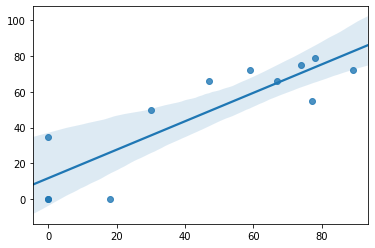

In [15]:
sns.regplot(X_train.reshape(1,12)[0], 
            y_train.reshape(1,12)[0])
plt.show()